# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 3. Сравнение оценок и эффективные оценки

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача в этом задании оценивается в **15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal = sns.color_palette("colorblind")[0]
color_for_laplace = sns.color_palette("colorblind")[1]
color_for_cauchy = sns.color_palette("colorblind")[2]

N = 500

norm_distr = sps.norm.rvs(size=N)
laplacian_distr = sps.laplace.rvs(size=N)
cauchy_distr = sps.cauchy.rvs(size=N)
np.random.seed(2020)

Постройте график плотности распределения для всех трех распределений на одних осях.

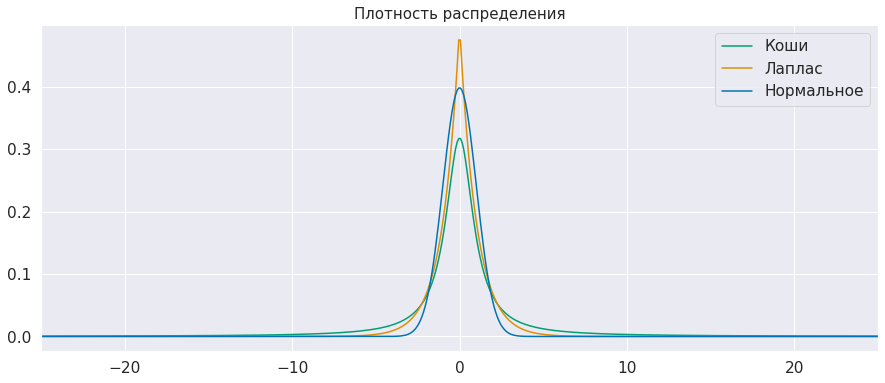

In [3]:
border = 25
grid = np.linspace(-border, border, N)
plt.figure(figsize=(15, 6))
plt.plot(grid, sps.cauchy.pdf(grid), color=color_for_cauchy, label='Коши')
plt.plot(grid, sps.laplace.pdf(grid), color=color_for_laplace, label='Лаплас')
plt.plot(grid, sps.norm.pdf(grid), color=color_for_normal, label='Нормальное')
plt.xlim(-border, border)
plt.legend()
plt.title('Плотность распределения', fontsize=15)
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:**
Как известно из теории, у распределения Коши не существует математического ожиданиия. Поэтому для него сложнее найти значение матожа по выборке.


Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [4]:
def truncated_mean(sample, alpha=0.3):
    sz = sample.shape[0]
    lowercut = int(alpha * sz)
    uppercut = sz - lowercut
    return np.mean(np.sort(sample)[lowercut:(uppercut - 1)])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [5]:
from scipy.integrate import quad


def asymp_var(distr, alpha, pdf):
    val, err = quad(pdf, float(0), float(distr.ppf(1 - alpha)))
    return 2 * (val + alpha * (distr.ppf(1 - alpha) ** 2)) / (1 - 2 * alpha) ** 2

Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для заголовка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

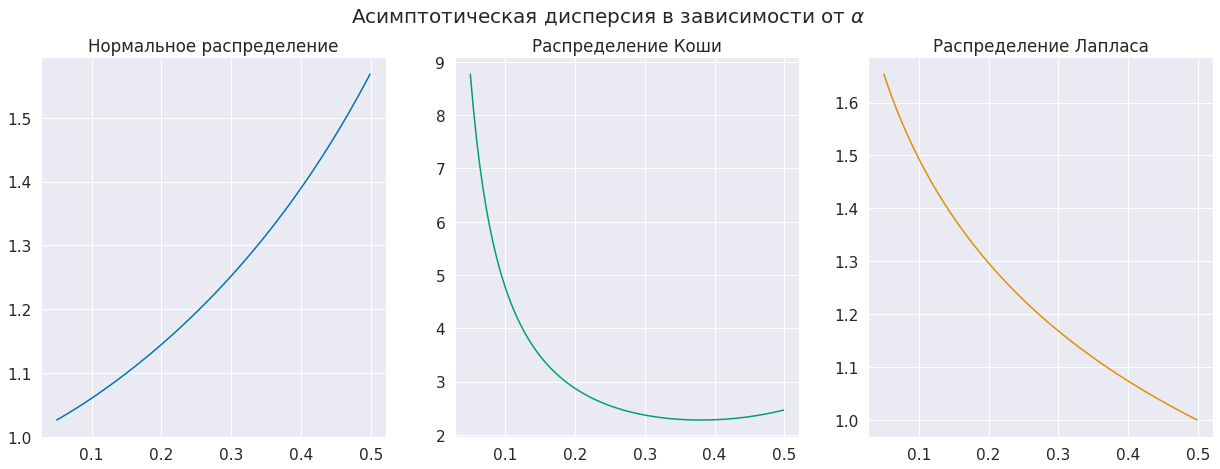

In [6]:
alpha_grid = np.linspace(0.05, 0.499, 100)
LIM = 5
fig, axs = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle('Асимптотическая дисперсия в зависимости от $\\alpha$', fontsize=20)

tmp_norm = [asymp_var(sps.norm, alpha_grid[i], lambda x: x ** 2 * sps.norm.pdf(x)) for i in range(100)]
axs[0].plot(alpha_grid, tmp_norm, color=color_for_normal)
axs[0].set_title('Нормальное распределение')

tmp_cauchy = [asymp_var(sps.cauchy, alpha_grid[i], lambda x: x ** 2 * sps.cauchy.pdf(x)) for i in range(100)]
axs[1].plot(alpha_grid, tmp_cauchy, color=color_for_cauchy)
axs[1].set_title('Распределение Коши')

tmp_laplac = [asymp_var(sps.laplace, alpha_grid[i], lambda x: x ** 2 * sps.laplace.pdf(x)) for i in range(100)]
axs[2].plot(alpha_grid, tmp_laplac, color=color_for_laplace)
axs[2].set_title('Распределение Лапласа')

plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:**
Если порядок нулевой, то оценка является оценкой среднего. Если мы имеем порядок $0.5$, то в результате усечения у нас либо остаётся несколько элементов, равных половинной порядковой статистике, либо не остаётся элементов вовсе (Nan), таким образом, это будет предельный случай, дающий оценку, которая никак не отражает выборку, кроме как находит в ней элемент, который является половинной порядковой статистикой.

Поскольку у Коши проблемы с матожиданием и конечными моментами, мы наблюдаем такой рост в нуле.

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [7]:
alpha_const = 0.35

trim_norm = [sps.trim_mean(norm_distr[:(i + 1)], alpha_const) for i in range(N)]
median_norm = [np.median(norm_distr[:(i + 1)]) for i in range(N)]
mean_norm = [np.mean(norm_distr[:(i + 1)]) for i in range(N)]

trim_lapl = [sps.trim_mean(laplacian_distr[:(i + 1)], alpha_const) for i in range(N)]
median_lapl = [np.median(laplacian_distr[:(i + 1)]) for i in range(N)]
mean_lapl = [np.mean(laplacian_distr[:(i + 1)]) for i in range(N)]

trim_cauch = [sps.trim_mean(cauchy_distr[:(i + 1)], alpha_const) for i in range(N)]
median_cauch = [np.median(cauchy_distr[:(i + 1)]) for i in range(N)]
mean_cauch = [np.mean(cauchy_distr[:(i + 1)]) for i in range(N)]

**Нормальное распределение**

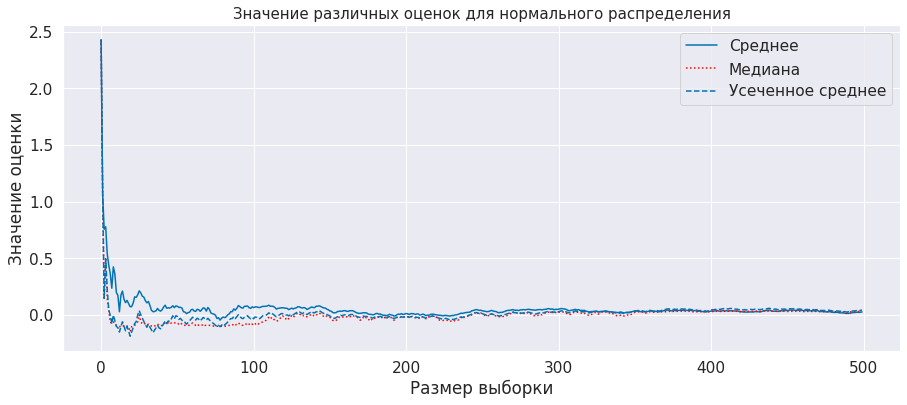

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(range(N), mean_norm, color=color_for_normal, label='Среднее')
plt.plot(range(N), median_norm, ':', color='red', label='Медиана')
plt.plot(range(N), trim_norm, '--', color=color_for_normal, label='Усеченное среднее')
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.title('Значение различных оценок для нормального распределения', fontsize=15)
plt.legend()
plt.show()

**Распределение Лапласа**

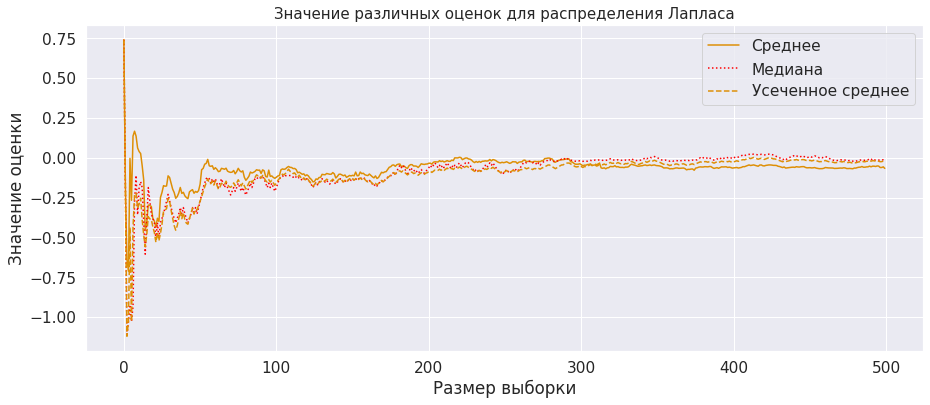

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(range(N), mean_lapl, color=color_for_laplace, label='Среднее')
plt.plot(range(N), median_lapl, ':', color='red', label='Медиана')
plt.plot(range(N), trim_lapl, '--', color=color_for_laplace, label='Усеченное среднее')
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.title('Значение различных оценок для распределения Лапласа', fontsize=15)
plt.legend()
plt.show()

**Распределение Коши**

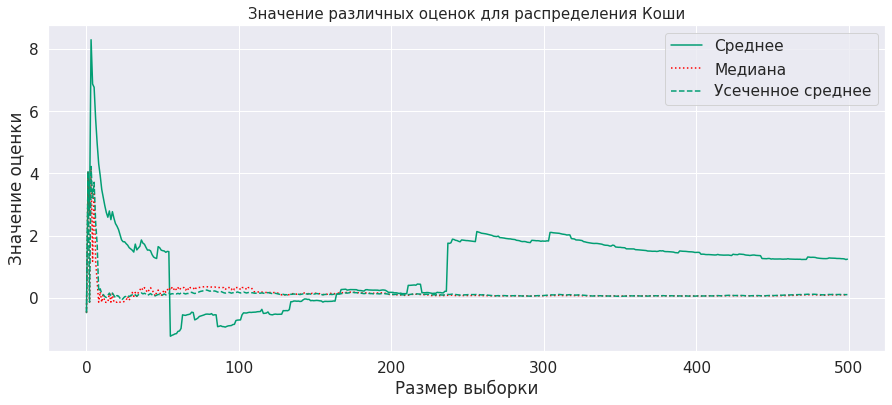

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(range(N), mean_cauch, color=color_for_cauchy, label='Среднее')
plt.plot(range(N), median_cauch, ':', color='red', label='Медиана')
plt.plot(range(N), trim_cauch, '--', color=color_for_cauchy, label='Усеченное среднее')
plt.xlabel('Размер выборки')
plt.ylabel('Значение оценки')
plt.title('Значение различных оценок для распределения Коши', fontsize=15)
plt.legend()
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**

У Коши не существует матожа, таким образом график сильно выбивается. Все остальные распределения "хорошие", их оценки являются "хорошими" и сходятся к единому значению.
Пики графиков соответствуют графику асимптотической дисперсии.


# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [11]:
!pip install -q gdown
!gdown https: // drive.google.com / uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

zsh:1: no matches found: uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta


In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("winequality-red.csv")

In [14]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [15]:
def categorize(row):
    if row['alcohol'] <= 10:
        return 'low alcohol'
    elif 10 < row['alcohol'] <= 12:
        return 'medium alcohol'
    else:
        return 'high alcohol'


data['category'] = data.apply(categorize, axis=1)

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [16]:
data.groupby(['category'])['residual sugar'].agg([np.median, np.mean])

,median,mean
category,,
high alcohol,2.3,2.760993
low alcohol,2.1,2.445984
medium alcohol,2.2,2.592264


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:**
Мы можем наблюдать, что количество сахара увеличивается с крепкостью алкоголя (как по медиане, так и по среднему).

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

Text(0.5, 1.0, 'Boxplot остаточного сахара по категориям при долях алкоголя')

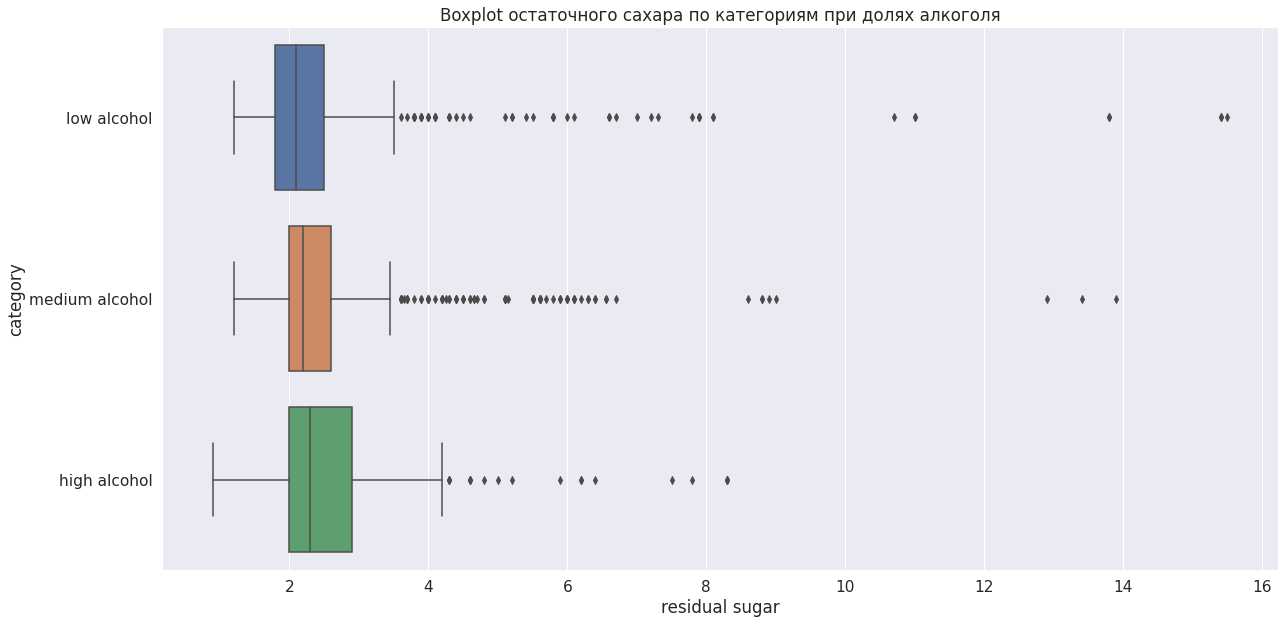

In [17]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x="residual sugar", y="category")
plt.title("Boxplot остаточного сахара по категориям при долях алкоголя")

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:**
Заметим, что оценки попадают в плотные части графика. Для оценивания содержания сахара лучше брать медиану, так как среднее значение больше подвергается влиянию выбросов, большое число которых мы наблюдаем на boxplot.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

Text(0.5, 1.0, 'Зависимость содержания алкоголя и кол-ва лимонной кислоты от качества алкоголя')

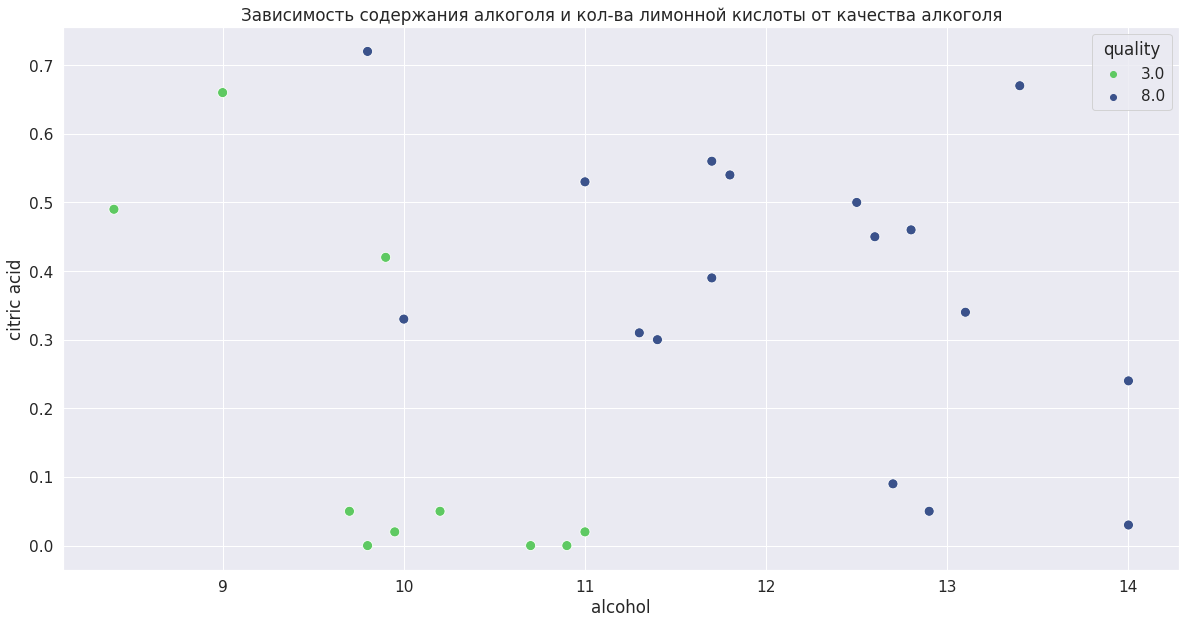

In [18]:
tmp_data = data.where((data['quality'] == 8) | (data['quality'] == 3))
palette = [palette[0]] + [palette[-1]]
plt.figure(figsize=(20, 10))
sns.scatterplot(data=tmp_data, x="alcohol", y="citric acid", hue="quality", s=100, palette=palette)
plt.title("Зависимость содержания алкоголя и кол-ва лимонной кислоты от качества алкоголя")

Найдите ОМП для двух этих распределений в предположении, что обе выборки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [19]:
data_good = data[data['quality'] == 8][['alcohol', 'citric acid']]
data_bad = data[data['quality'] == 3][['alcohol', 'citric acid']]

mu_good = data_good.mean()
mu_bad = data_bad.mean()

biased_good = data_good - mu_good
biased_bad = data_bad - mu_bad

Sigma_good = biased_good.T @ biased_good
Sigma_bad = biased_bad.T @ biased_bad

In [20]:
x = np.linspace(8, 15, 400)
y = np.linspace(-0.05, 0.8, 400)
X, Y = np.meshgrid(x, y)

mvn_good = sps.multivariate_normal(mean=mu_good, cov=Sigma_good)
mvn_bad = sps.multivariate_normal(mean=mu_bad, cov=Sigma_bad)

pdf_good = mvn_good.pdf(np.dstack((X, Y)))
pdf_bad = mvn_bad.pdf(np.dstack((X, Y)))

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [21]:
from matplotlib.colors import ListedColormap


def get_density_cmap(name):
    cmap = plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N) ** 2
    return ListedColormap(cmap_col)

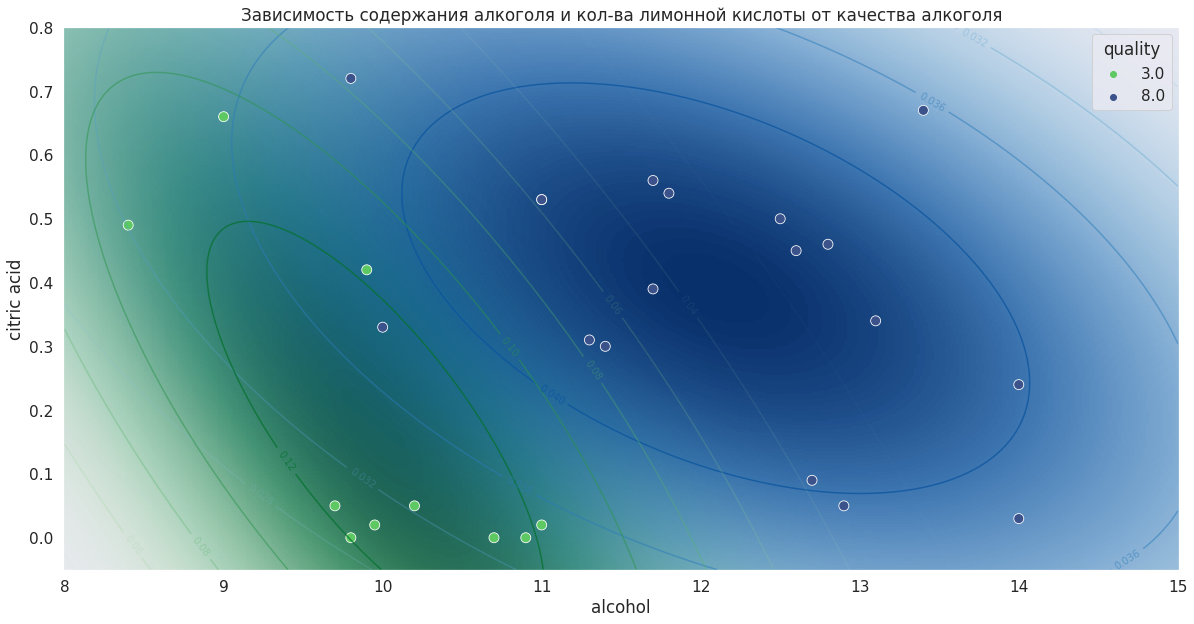

In [22]:
plt.figure(figsize=(20, 10))
plt.pcolormesh(X, Y, pdf_bad, cmap=get_density_cmap("Greens"), shading='auto')
plt.pcolormesh(X, Y, pdf_good, cmap=get_density_cmap("Blues"), shading='auto')
CS_good = plt.contour(X, Y, pdf_good, cmap=get_density_cmap("Blues"))
CS_bad = plt.contour(X, Y, pdf_bad, cmap=get_density_cmap("Greens"))
plt.clabel(CS_good, inline=1, fontsize=10)
plt.clabel(CS_bad, inline=1, fontsize=10)
sns.scatterplot(data=tmp_data, x="alcohol", y="citric acid", hue="quality", s=100, palette=palette)
plt.title("Зависимость содержания алкоголя и кол-ва лимонной кислоты от качества алкоголя")
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**
Судя по графику, сомелье предпочитают более крепкий алкоголь, у него же выше содержание лимонной кислоты.

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $ \theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$.

Нижняя оценка дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера равна $\frac{1}{I_X(\theta)}$. Для указанного распределения она равна $\frac{\theta(1-\theta)}{N}$


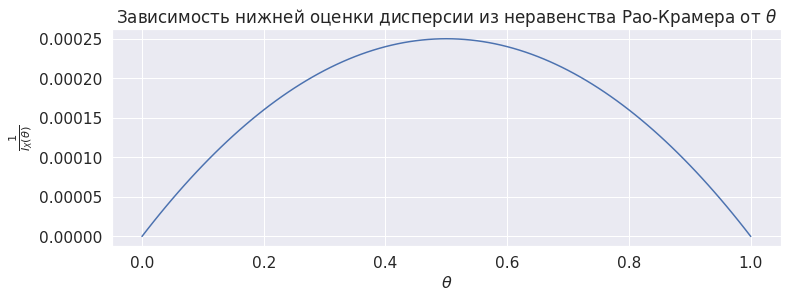

In [23]:
end = 0.01
N = 1000
theta_grid = np.arange(0, (1 + end), end)
low_est = (theta_grid * (1 - theta_grid)) / N

plt.figure(figsize=(12, 4))
plt.plot(theta_grid, low_est)
plt.title("Зависимость нижней оценки дисперсии из неравенства Рао-Крамера от $\\theta$")
plt.xlabel("$\\theta$", fontsize=16)
plt.ylabel("$\\frac{1}{I_X(\\theta)}$", fontsize=16)
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод**
Таким образом, чем ближе $\theta$ к $0.5$, тем хуже мы можем её оценить, так как нижняя оценка симметрична относительно этого значения. Таким образом, при приближении к $0.5$ будет расти дисперсия оценки, а значит, точность таковой будет наименьшей.

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

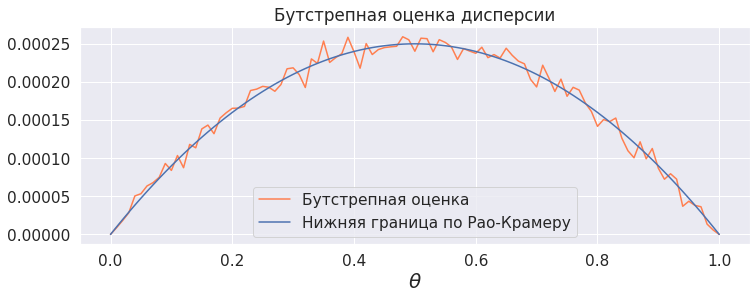

In [24]:
var_est = []

for theta in theta_grid:
    ef_est = np.mean(sps.bernoulli.rvs(theta, size=N))
    s_but = sps.bernoulli.rvs(ef_est, size=(N, N))
    effective_est = np.mean(s_but, axis=1)
    var_est.append(np.var(effective_est))

plt.figure(figsize=(12, 4))
plt.title("Бутстрепная оценка дисперсии")
plt.xlabel("$\\theta$", fontsize=20)
plt.plot(theta_grid, var_est, color='coral', label='Бутстрепная оценка')
plt.plot(theta_grid, low_est, label='Нижняя граница по Рао-Крамеру')
plt.legend()
plt.show()

**Вывод**

Мы видим, что график бутстрепной оценки дисперсии эффективной оценки приближается к графику зависимости нижней оценки дисперсии произвольной несмещенной оценки.

